# SD-TSIA204 Statistics: Linear Models 
Télécom Paris - Institut Polytechnique de Paris

TP01 - Linear Regression | 11 January 2023

 Artur Dandolini Pescador
 

 -------


Importing packages:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn import linear_model

Let us use the Investment Data Set downloadable from the institution web site as a CSV (blank separated) file “invest.txt”. Before going to the Steps of this tutorial, please take a look at the preceding it preliminary part, which suggests a declarative overview of several notions connected to the linear regression model.

### 1. Importing the data
Import the data from the file “invest.txt” and print them in a readable form, e.g. a table containing
first 5 observations.

In [5]:
data = pd.read_csv('invest.txt', sep=' ') # read the data
data.head(5) # show the first 5 rows

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


### 2. Plotting the data
Plot the data with Gross National Product (GNP, column “gnp”) being the abscissa and Investment
(column “invest”) being the ordinate.

NOTE : When working with monetary data, one often resorts to a logarithm transform to account for inequality of scale. First, transform the two above mentioned columns, GNP and Investment, via logarithm ; further in this exercise we will be working with these columns log-transformed. In Steps 3–6,
all the calculations should be done with elementary arithmetic and not involving existing libraries
for running linear regression.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


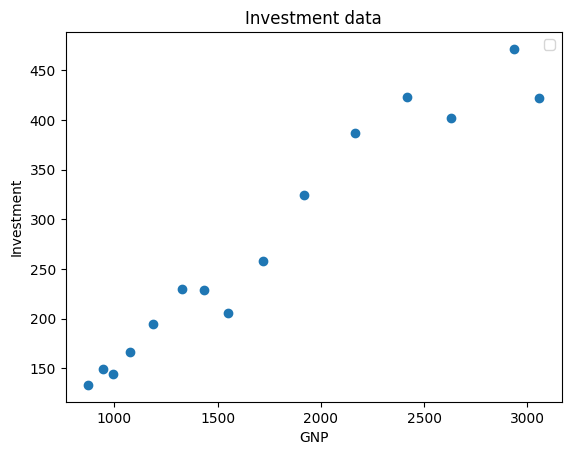

In [6]:
plt.scatter(data['gnp'], data['invest']) # plot the data
plt.xlabel('GNP') # set the x label
plt.ylabel('Investment') # set the y label
plt.title('Investment data')
plt.legend()
plt.show() # show the plot

In [7]:
x=np.log(data['gnp']) # applying log into gnp column
y=np.log(data['invest']) # applying log into invest column

### 3. Linear Regression
For the linear regression of Investment on GNP, estimate the intercept and the slope and their
standard deviations, as well as the determination coefficient for the ordinary least squares. Output
them in a readable form.

In [8]:
n = np.size(x) # number of observations that we have
x_mean = np.mean(x)
y_mean = np.mean(y)
x_var = np.sum((x-x_mean)**2)

In [9]:
# calculate the coefficients
beta1 = np.sum((x-x_mean)*(y-y_mean))/x_var
beta0 = y_mean -beta1*x_mean
print('beta0 = ', beta0,',','beta1 = ', beta1)

beta0 =  -1.9635913352301815 , beta1 =  1.015281401598871


In [43]:
# calculate the predicted values
y_pred = beta0 + beta1*x

# standard deviations
residual = y - y_pred
s2 = np.sum(residual**2)/(n-2) # variance of the residuals

sd_beta0 = np.sqrt(s2*(1/n + x_mean**2/x_var)) # standard deviation of beta0
sd_beta1 = np.sqrt(s2/x_var) # standard deviation of beta1

print('sd_beta0 = ', sd_beta0,',','sd_beta1 = ', sd_beta1)

sd_beta0 =  0.4095472716623081 , sd_beta1 =  0.05538306035485281


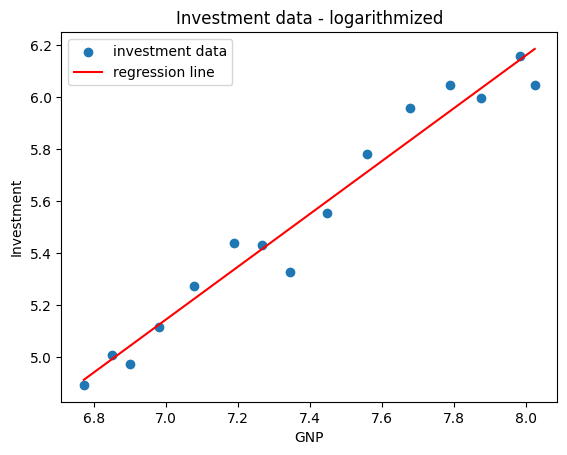

In [11]:
# plot the regression line
plt.scatter(x, y, label = 'investment data')
plt.plot(x, y_pred, color='red',label = 'regression line')
plt.xlabel('GNP')
plt.ylabel('Investment')
plt.title('Investment data - logarithmized')
plt.legend()


In [12]:
# Determination coefficient (R^2)
SSR = np.sum((y - y_pred)**2) # sum of squared residuals
SST = np.sum((y - y_mean)**2) # sum of squared total
Rsq =  1 - (SSR/SST)

print(f"Determination coefficient R^2 = {Rsq.round(4)}")

Determination coefficient R^2 = 0.9628


### 4. Testing the significance of the slope
Test the significance of the slope using the Student-t test. Report the value of the test statistic and
the p-value.


In [13]:
def t_p_value(t_stat, degrees_of_freedom):
    ''' Returns the p-value for a Student's t-test given 
    the test statistic and the degrees of freedom.'''
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=degrees_of_freedom))
    return p_value

# t-statistics
p = 1
t_student = beta1/sd_beta1 
p_value1 = t_p_value(t_student, n-p-1) # p-value for the t-test

print('The Student\'s t-test for H0: beta1 = 0 return the value of the test statistic')
print(f't = {t_student.round(4)} and the p-value = {p_value1}')

The Student's t-test for H0: beta1 = 0 return the value of the test statistic
t = 18.332 and the p-value = 1.1363709973011282e-10


### 5. Confidence intervals
For the GNP value 1000, estimate the necessary Investment, provide confidence and prediction
intervals for the 90% level.

In [14]:
def predict_investment(gnp):
    """Returns the predicted investment given the GNP."""
    gnp_log = np.log(gnp)
    return beta0 + beta1 * gnp_log

# prediction for GNP = 1000
predict_inv_gnp_1000 = np.exp(predict_investment(1000))
print("Prediction value for GNP = 1000 is: ", predict_inv_gnp_1000.round(2))

Prediction value for GNP = 1000 is:  155.98


In [15]:
# Confidence interval for the prediction
# for GNP = 1000
# for confidence level 90%
alpha = 0.9

# confidence interval
CI_S = beta0 + beta1 * x + stats.t.ppf((1-alpha)/2, n-2) * np.sqrt(s2*(1/n + (x-x_mean)**2/x_var))
CI_I = beta0 + beta1 * x - stats.t.ppf((1-alpha)/2, n-2) * np.sqrt(s2*(1/n + (x-x_mean)**2/x_var))

# prediction interval
PI_S = beta0 + beta1 * x + stats.t.ppf((1-alpha)/2, n-2) * np.sqrt(s2*(1 + 1/n + (x-x_mean)**2/x_var))
PI_I = beta0 + beta1 * x - stats.t.ppf((1-alpha)/2, n-2) * np.sqrt(s2*(1 + 1/n + (x-x_mean)**2/x_var))

print(f"Confidence interval for the prediction for GNP = 1000 at the level {alpha} is: ",np.exp(CI_S[0]).round(2), " and ", np.exp(CI_I[0]).round(2))
print(f"Prediction interval for the prediction for GNP = 1000 at the level {alpha} is: ",np.exp(PI_S[0]).round(2), " and ", np.exp(PI_I[0]).round(2))

Confidence interval for the prediction for GNP = 1000 at the level 0.9 is:  126.49  and  146.11
Prediction interval for the prediction for GNP = 1000 at the level 0.9 is:  114.57  and  161.32


### 6. Plot
On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the
estimated regression line, the confidence and prediction intervals for all values of log(GNP) between
its minimum and maximum in the data set.

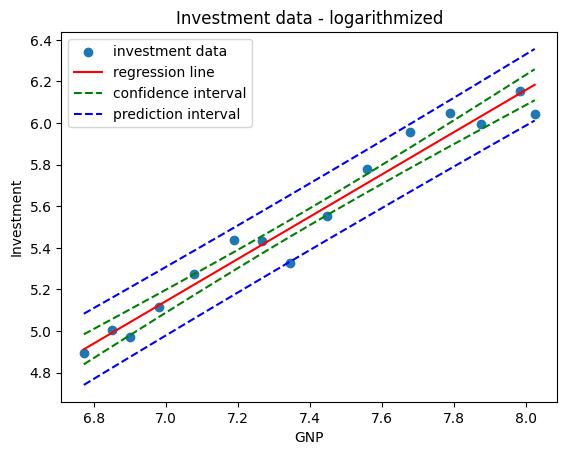

In [16]:
plt.scatter(x, y, label = 'investment data')
plt.plot(x, y_pred, color='red',label = 'regression line')
plt.plot(x, CI_S, 'g--',label = 'confidence interval')
plt.plot(x, CI_I,'g--')

plt.plot(x, PI_S, 'b--',label = 'prediction interval')
plt.plot(x, PI_I, 'b--')

plt.xlabel('GNP')
plt.ylabel('Investment')
plt.title('Investment data - logarithmized')
plt.legend()

### 7. Regression
Estimate the intercept, the slope, and the determination coefficient and predict the necessary Investment for the GNP value 1000 using existing functionality. The class LinearRegression() from
sklearn.linear_model is suggested but not obligatory ; any other available implementation of
the linear regression can be used instead. Report the estimated values and make sure that those
calculated ‘by hand’ (Steps 3 and 5) coincide with the ones obtained using existing implementation.

In [44]:
lin_model = linear_model.LinearRegression() # create the model
lin_model.fit(x.values.reshape(-1,1), y) # fit the model

# print the coefficients
print('beta0 = ', lin_model.intercept_,',','beta1 = ', lin_model.coef_[0])

# determination coefficient (R^2)
print(f"Determination coefficient R^2 = {lin_model.score(x.values.reshape(-1,1), y).round(4)}")

# prediction for GNP = 1000
predict_inv_gnp_1000 = np.exp(lin_model.predict(np.log(1000).reshape(-1,1)))
print("Prediction value for GNP = 1000 is: ", predict_inv_gnp_1000.round(2))


beta0 =  -1.9635913352301833 , beta1 =  1.0152814015988711
Determination coefficient R^2 = 0.9628
Prediction value for GNP = 1000 is:  [155.98]


We can see above that we got the same results using the class **LinearRegression()** from **sklearn.linear_model** and calculating "by hand" during the previous steps.

### 8. Plot
On a plot with logarithmic axes (GNP as abscissa and Investment as ordinate), plot the data, the
regression line and the predicted point (in a different color). The graphic should coincide with the
corresponding elements from the one in Step 6.

NOTE : Further, consider an additional explanatory variable, namely Interest (column “interest”, without a
logarithmic transform). In Steps 9–12, all the calculations should be done with elementary arithmetic and not involving existing libraries for running linear regression. (Use function inv from
numpy.linalg for inversion of a matrix (“ two-dimensional numpy-array) and function eig from
the same package for calculating its eigenvalues.)


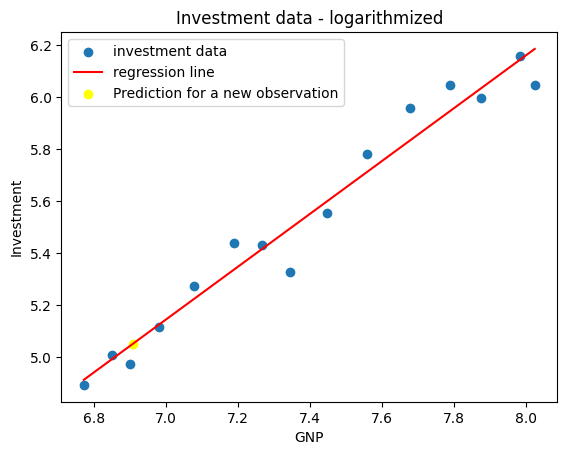

In [45]:
y_pred1 = lin_model.predict(x.values.reshape(-1,1)) # calculate the predicted values

# predicted point
x_1000 = 1000
y_pred_1000 = (predict_investment(1000))

# plot the regression line
plt.scatter(x, y, label = 'investment data')
plt.plot(x, y_pred1, color='red',label = 'regression line')
plt.scatter(np.log(x_1000), y_pred_1000, color = 'yellow', label = 'Prediction for a new observation')
plt.xlabel('GNP')
plt.ylabel('Investment')
plt.title('Investment data - logarithmized')
plt.legend()

### 9. Computing the associated Gram Matrix
For the linear regression of Investment on GNP and Interest, compute the associated Gram matrix.
Is it of full rank ?


In [42]:
# gram matrix
X = np.column_stack((np.ones(n), x))
X = np.column_stack((X, data['interest']))
G = X.T @ X

print ("Gram matrix: \n", G)

# check if the matrix is full rank
ret = np.linalg.matrix_rank(G) == G.shape[0]
print("Is it full rank? ",ret)


Gram matrix: 
 [[ 15.         110.75282116 111.79      ]
 [110.75282116 820.24847688 839.18854302]
 [111.79       839.18854302 943.8557    ]]
Is it full rank?  True
